# **PHASE 2 — Structured EDA**

## **2.1 Univariate Exploration**
Analyze each variable independently.

## **2.2 Bivariate Exploration**
Study relationships between two variables.

## **2.3 Time-Series Analysis**
Analyze trends over time. 

## **2.4 Funnel Exploration**
Study how users move through the marketing funnel.

## **2.5 Identify Key Issues**
List problems discovered during EDA 

In [1]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-L3GBMQ5\\SQLEXPRESS;"
    "Database=Q4 Multi-Channel Performance & Forecast Alignment Analysis;"
    "Trusted_Connection=yes;"
)


In [2]:
df_perf = pd.read_sql_query("SELECT * FROM Performance", conn)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5032\2164272931.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_perf = pd.read_sql_query("SELECT * FROM Performance", conn)


In [3]:
df_imp = pd.read_sql_query("SELECT * FROM product_impact", conn)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5032\904220287.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_imp = pd.read_sql_query("SELECT * FROM product_impact", conn)


In [4]:
df_fore = pd.read_sql("SELECT * FROM forecasting", conn)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5032\1651432634.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_fore = pd.read_sql("SELECT * FROM forecasting", conn)


In [8]:
df_daily = (df_perf
            .groupby(['date', 'channel_id', 'campaign_id'])
            .agg({'impressions': 'sum'
                  ,'clicks': 'sum'
                  ,'conversions': 'sum'
                  ,'spend': 'sum'
                  ,'revenue': 'sum'
}))

In [11]:
df_daily.rename(columns={'Date': 'date'}, inplace=True)

In [16]:

df_daily = (df_perf
            .groupby(['date', 'channel_id', 'campaign_id'])
            .agg({'impressions': 'sum'
                  ,'clicks': 'sum'
                  ,'conversions': 'sum'
                  ,'spend': 'sum'
                  ,'revenue': 'sum'
})
            .reset_index()
            )

In [17]:
df_daily.rename(columns={'Date': 'date'}, inplace=True)

In [27]:
df_master = pd.read_sql("SELECT * FROM master_daily", conn)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_5032\3418188008.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_master = pd.read_sql("SELECT * FROM master_daily", conn)


----------------

### Univariate Exploration

In [30]:
df_master.describe()[[
    'spend', 'impressions', 'clicks', 'conversions', 'revenue',
    'POAS', 'CTR', 'CVR',
    'awareness_index', 'consideration_index', 'impact_score',
    'forecasted_revenue'
]]

,spend,impressions,clicks,conversions,revenue,POAS,CTR,CVR,awareness_index,consideration_index,impact_score,forecasted_revenue
count,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000,21585.000000
mean,185923.300440,12046.533380,1191.494510,9831.937688,83393.530229,0.064790,0.098887,8.595494,0.565085,0.313758,1.255644,187.210331
std,20565.654455,1913.207517,238.901777,1099.461092,19418.304291,0.007350,0.011897,2.270270,0.250415,0.204134,0.434162,129.990057
min,107387.000000,4891.000000,434.000000,5101.000000,27537.730118,0.036677,0.055131,2.519829,0.100800,0.050500,0.502100,1.000000
25%,171742.000000,10716.000000,1025.000000,9086.000000,69698.129555,0.059783,0.090815,6.980269,0.358500,0.144600,0.882000,78.000000
50%,185958.000000,11970.000000,1178.000000,9820.000000,81905.711060,0.064767,0.099000,8.363204,0.567800,0.272600,1.274300,155.000000
75%,200085.000000,13295.000000,1345.000000,10573.000000,95526.300049,0.069752,0.106916,9.939512,0.780800,0.453200,1.622300,296.000000
max,263937.000000,20507.000000,2337.000000,13869.000000,179477.799561,0.094009,0.145977,28.021207,0.996400,0.919200,1.999700,450.000000


Spend Distribution

<Axes: >

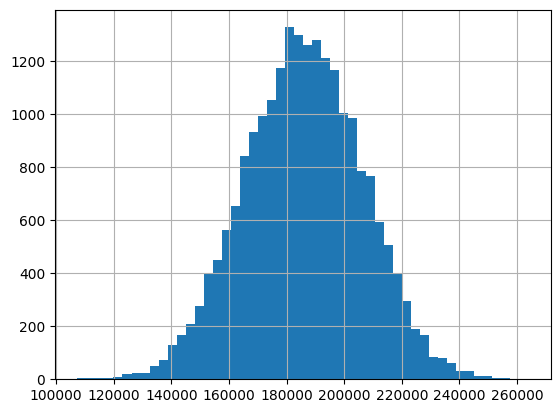

In [31]:
df_master['spend'].hist(bins=50)

Revenue Distribution

<Axes: >

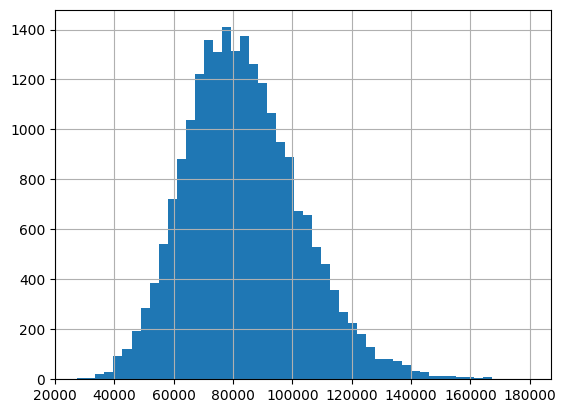

In [32]:
df_master['revenue'].hist(bins=50)


CTR / CVR Distribution

<Axes: >

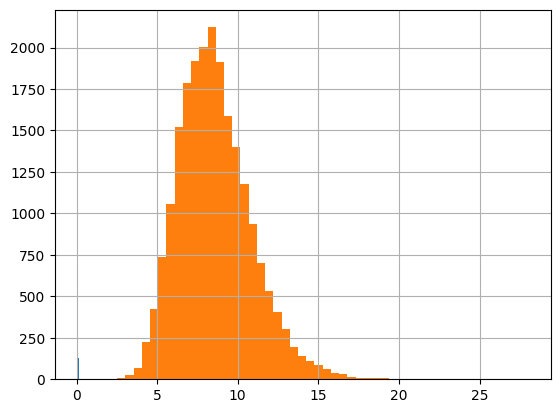

In [33]:
df_master['CTR'].hist(bins=50)
df_master['CVR'].hist(bins=50)

______________________

### Bivariate Exploration

Spend vs Revenue

<Axes: xlabel='spend', ylabel='revenue'>

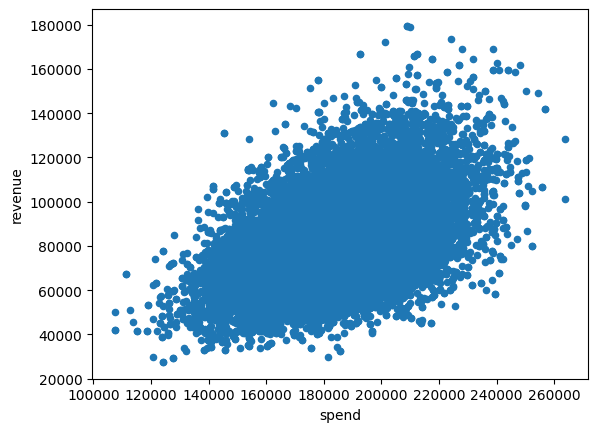

In [34]:
df_master.plot.scatter(x='spend', y='revenue')


CTR vs CVR

<Axes: xlabel='CTR', ylabel='CVR'>

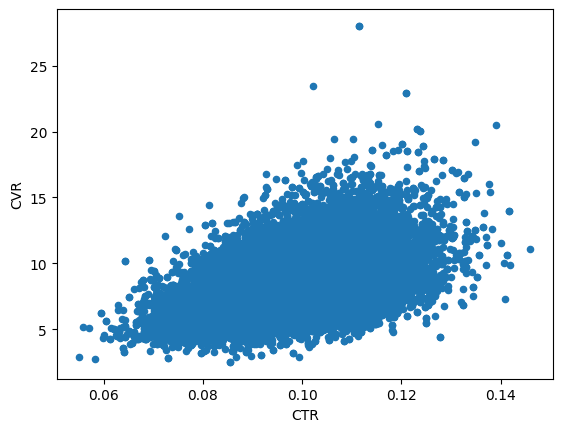

In [35]:
df_master.plot.scatter(x='CTR', y='CVR')

Correlation Matrix

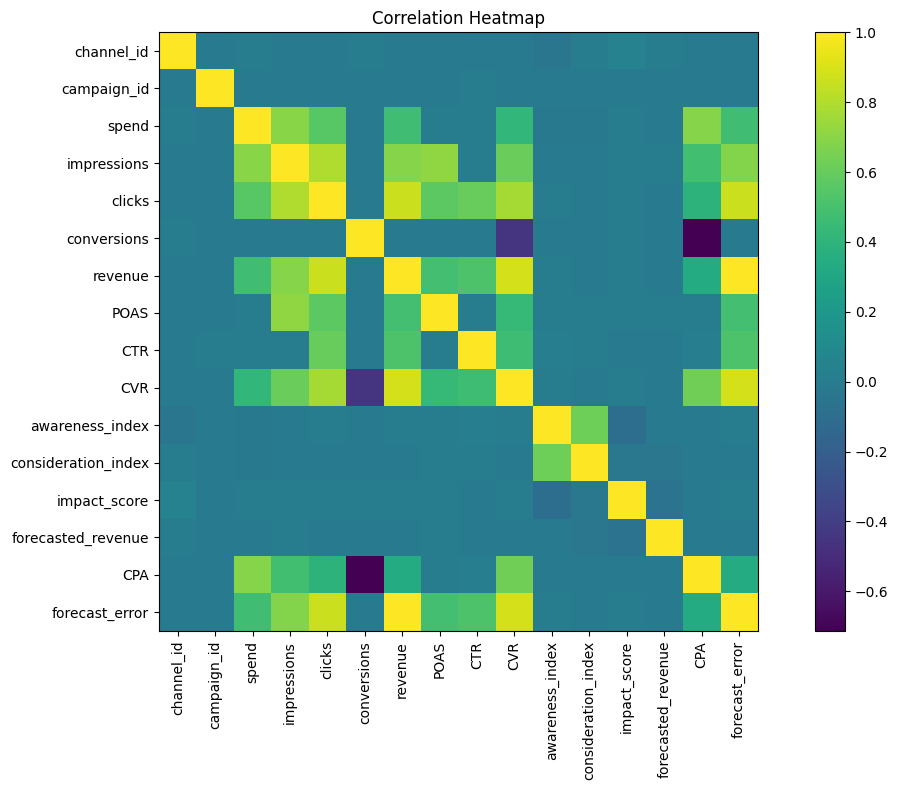

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Keep ONLY numeric columns
numeric_df = df_master.select_dtypes(include=[np.number])

# Compute correlation
corr = numeric_df.corr().values
labels = numeric_df.corr().columns

plt.figure(figsize=(12, 8))

# Use matplotlib’s built-in imshow (no color spec!)
plt.imshow(corr)

plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

plt.title("Correlation Heatmap")
plt.colorbar()

plt.tight_layout()
plt.show()


 ______________

### Time-Series Analysis

Daily Spend Trend

<Axes: title={'center': 'Daily Spend Trend'}, xlabel='date'>

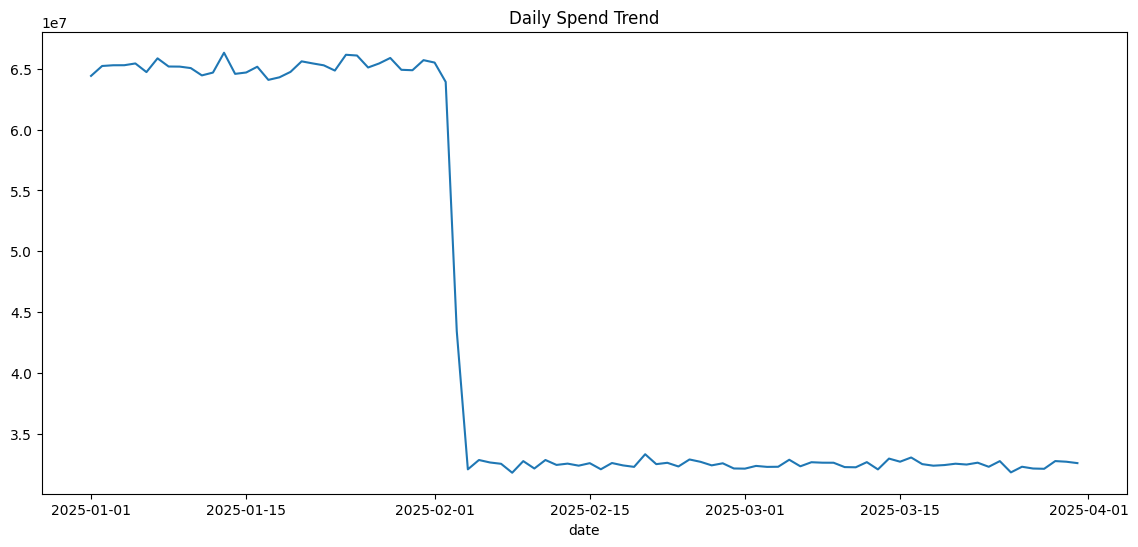

In [37]:
df_master.groupby('date')['spend'].sum().plot(figsize=(14,6), title="Daily Spend Trend")


Daily Revenue Trend

<Axes: title={'center': 'Daily Revenue Trend'}, xlabel='date'>

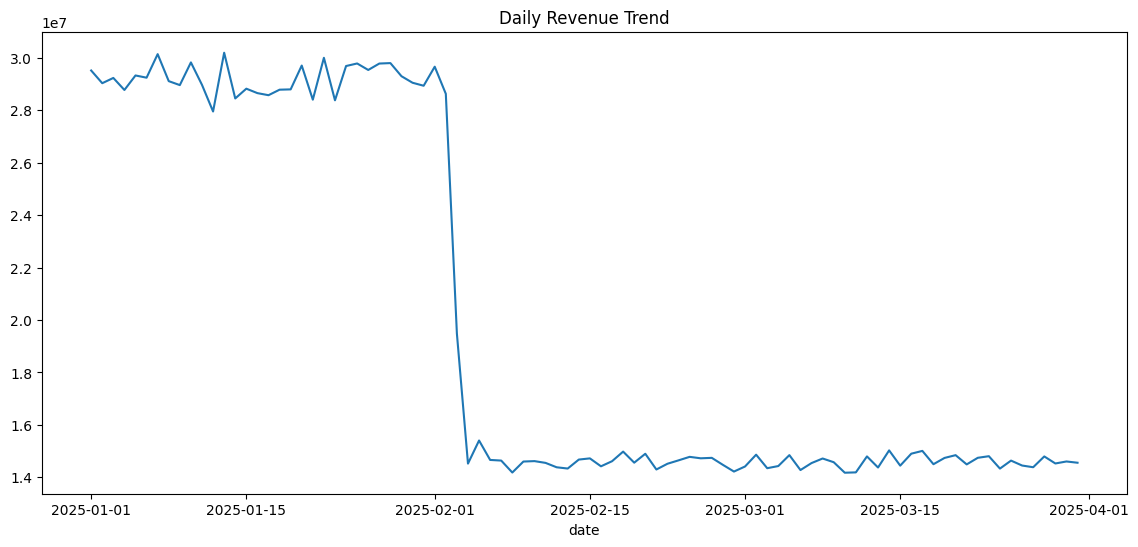

In [38]:
df_master.groupby('date')['revenue'].sum().plot(figsize=(14,6), title="Daily Revenue Trend")

Daily CTR / CVR Trend

<Axes: title={'center': 'Daily CVR Trend'}, xlabel='date'>

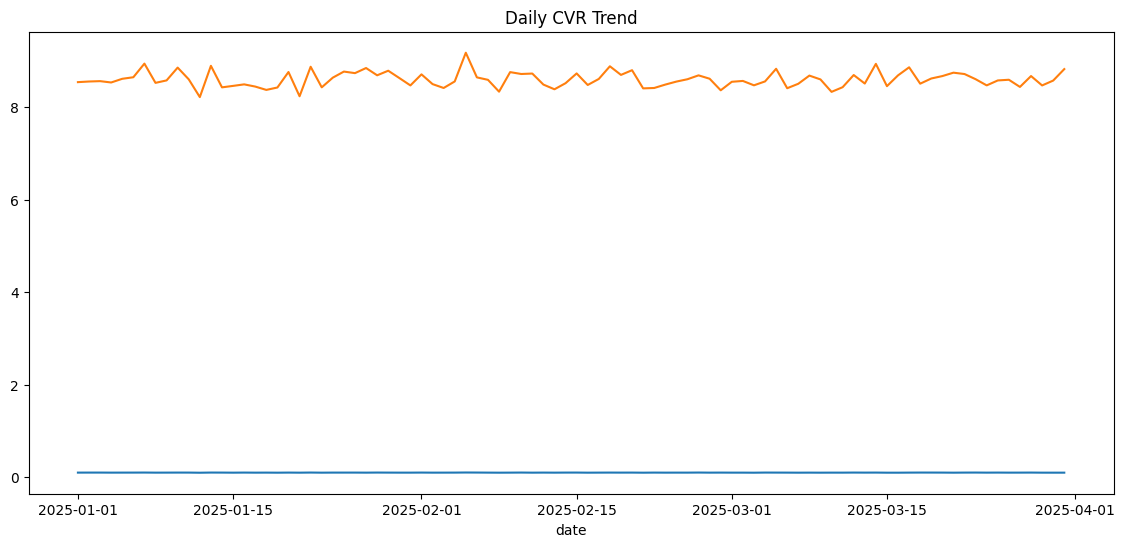

In [40]:
df_master.groupby('date')['CTR'].mean().plot(figsize=(14,6), title="Daily CTR Trend")
df_master.groupby('date')['CVR'].mean().plot(figsize=(14,6), title="Daily CVR Trend")

_________________

### Funnel Analysis (Awareness → Click → Conversion → Revenue)

Awareness → Consideration → Click Conversion

In [41]:
df_funnel = df_master.groupby('date').agg({
    'awareness_index': 'mean',
    'consideration_index': 'mean',
    'clicks': 'sum',
    'conversions': 'sum',
    'revenue': 'sum'
})
df_funnel.head()


,awareness_index,consideration_index,clicks,conversions,revenue
date,,,,,
2025-01-01,0.37730,0.28056,415272,3486158,2.951855e+07
2025-01-02,0.63436,0.34904,419798,3453494,2.903332e+07
2025-01-03,0.63844,0.33196,420878,3445430,2.923400e+07
2025-01-04,0.43524,0.16802,414118,3427068,2.877442e+07
2025-01-05,0.60856,0.32142,418244,3448274,2.932847e+07


Funnel Ratios

In [42]:
df_funnel['click_through_rate'] = df_funnel['clicks'] / df_master.groupby('date')['impressions'].sum()
df_funnel['conversion_rate'] = df_funnel['conversions'] / df_funnel['clicks']
df_funnel['rev_per_conversion'] = df_funnel['revenue'] / df_funnel['conversions']

--------------

### Key Issue Detection

1. Low CTR channels/days

In [43]:
low_ctr = df_master[df_master['CTR'] < df_master['CTR'].quantile(0.10)]

In [44]:
low_ctr

,date,channel_id,campaign_id,spend,impressions,clicks,conversions,revenue,POAS,CTR,CVR,awareness_index,consideration_index,impact_score,forecasted_revenue,expected_conversions,flag_clicks_gt_impressions,flag_conversions_gt_clicks,flag_negative_spend
3,2025-01-01,1,1004,187534.0,10128,844,10325,53889.489960,0.054006,0.083333,5.218816,0.8447,0.7692,1.6891,1.0,None,False,False,False
7,2025-01-01,1,1008,163686.0,11523,900,11127,66608.549835,0.070397,0.078105,5.985929,0.8447,0.7692,1.6891,1.0,None,False,False,False
9,2025-01-01,1,1010,198508.0,14313,1106,10321,75658.280594,0.072103,0.077272,7.329815,0.8447,0.7692,1.6891,1.0,None,False,False,False
13,2025-01-01,1,1014,172500.0,10138,648,10411,37458.820429,0.058771,0.063918,3.597790,0.8447,0.7692,1.6891,1.0,None,False,False,False
22,2025-01-01,1,1023,169237.0,10116,736,7655,58335.200211,0.059774,0.072756,7.620456,0.8447,0.7692,1.6891,1.0,None,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21538,2025-03-31,4,1024,167044.0,11592,960,8783,69932.129425,0.069395,0.082816,7.961544,0.9087,0.5850,1.0650,449.0,None,False,False,False
21540,2025-03-31,4,1026,178997.0,10837,839,10879,65299.599274,0.060543,0.077420,6.001879,0.9087,0.5850,1.0650,449.0,None,False,False,False
21560,2025-03-31,5,1011,238804.0,17857,1452,9164,76693.609802,0.074777,0.081313,8.368471,0.8353,0.6399,0.8513,450.0,None,False,False,False
21577,2025-03-31,5,1028,179107.0,11006,916,7896,78985.569771,0.061449,0.083227,10.002592,0.8353,0.6399,0.8513,450.0,None,False,False,False


2. High CPA (cost per acquisition)

In [45]:
df_master['CPA'] = df_master['spend'] / df_master['conversions']
high_cpa = df_master[df_master['CPA'] > df_master['CPA'].quantile(0.90)]


In [46]:
high_cpa

,date,channel_id,campaign_id,spend,impressions,clicks,conversions,revenue,POAS,CTR,CVR,awareness_index,consideration_index,impact_score,forecasted_revenue,expected_conversions,flag_clicks_gt_impressions,flag_conversions_gt_clicks,flag_negative_spend,CPA
46,2025-01-01,2,1012,208069.0,13421,1329,8647,88338.310791,0.064503,0.099024,10.215238,0.1412,0.1350,1.8464,2.0,None,False,False,False,24.062565
52,2025-01-01,2,1018,187437.0,12432,1356,7829,103596.989731,0.066326,0.109073,13.231994,0.1412,0.1350,1.8464,2.0,None,False,False,False,23.941372
77,2025-01-01,3,1008,215597.0,11580,1051,7821,69637.349541,0.053711,0.090760,8.903495,0.1052,0.0609,1.1839,3.0,None,False,False,False,27.566424
86,2025-01-01,3,1017,222612.0,13684,1129,9206,90557.340530,0.061470,0.082505,9.836111,0.1052,0.0609,1.1839,3.0,None,False,False,False,24.181186
111,2025-01-01,4,1007,238317.0,13987,1132,9707,86085.459908,0.058691,0.080932,8.867851,0.2765,0.2284,1.9436,4.0,None,False,False,False,24.551046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552,2025-03-31,5,1003,243550.0,18258,1800,8827,118863.401306,0.074966,0.098587,13.465721,0.8353,0.6399,0.8513,450.0,None,False,False,False,27.591481
21553,2025-03-31,5,1004,207118.0,15952,1456,8225,96105.859375,0.077019,0.091274,11.683367,0.8353,0.6399,0.8513,450.0,None,False,False,False,25.181520
21560,2025-03-31,5,1011,238804.0,17857,1452,9164,76693.609802,0.074777,0.081313,8.368471,0.8353,0.6399,0.8513,450.0,None,False,False,False,26.058926
21566,2025-03-31,5,1017,194371.0,12009,1134,6617,84459.749924,0.061784,0.094429,12.762454,0.8353,0.6399,0.8513,450.0,None,False,False,False,29.374490


3. Underperforming dates (Revenue drop)

In [47]:
low_revenue = df_master[df_master['revenue'] < df_master['revenue'].quantile(0.10)]

In [48]:
low_revenue

,date,channel_id,campaign_id,spend,impressions,clicks,conversions,revenue,POAS,CTR,CVR,awareness_index,consideration_index,impact_score,forecasted_revenue,expected_conversions,flag_clicks_gt_impressions,flag_conversions_gt_clicks,flag_negative_spend,CPA
3,2025-01-01,1,1004,187534.0,10128,844,10325,53889.489960,0.054006,0.083333,5.218816,0.8447,0.7692,1.6891,1.0,None,False,False,False,18.163099
13,2025-01-01,1,1014,172500.0,10138,648,10411,37458.820429,0.058771,0.063918,3.597790,0.8447,0.7692,1.6891,1.0,None,False,False,False,16.569014
15,2025-01-01,1,1016,151896.0,8587,808,8324,59985.349411,0.056532,0.094096,7.206053,0.8447,0.7692,1.6891,1.0,None,False,False,False,18.247958
22,2025-01-01,1,1023,169237.0,10116,736,7655,58335.200211,0.059774,0.072756,7.620456,0.8447,0.7692,1.6891,1.0,None,False,False,False,22.108034
38,2025-01-01,2,1004,181401.0,10964,755,9142,52736.230358,0.060441,0.068862,5.768358,0.1412,0.1350,1.8464,2.0,None,False,False,False,19.842595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21558,2025-03-31,5,1009,168009.0,10292,867,9973,59686.899773,0.061259,0.084240,5.984651,0.8353,0.6399,0.8513,450.0,None,False,False,False,16.846385
21565,2025-03-31,5,1016,149879.0,7973,768,8894,54599.819717,0.053196,0.096325,6.138577,0.8353,0.6399,0.8513,450.0,None,False,False,False,16.851698
21567,2025-03-31,5,1018,197407.0,11267,995,10749,57515.540619,0.057075,0.088311,5.350318,0.8353,0.6399,0.8513,450.0,None,False,False,False,18.365150
21573,2025-03-31,5,1024,163683.0,10182,898,10964,59114.530632,0.062206,0.088195,5.391571,0.8353,0.6399,0.8513,450.0,None,False,False,False,14.929132


4. Forecast Deviations (Actual - Forecast)

In [49]:
df_master['forecast_error'] = df_master['revenue'] - df_master['forecasted_revenue']

In [50]:
df_master['forecast_error']

0         82654.518463
1         93187.560753
2        106310.199936
3         53888.489960
4         95921.029305
             ...      
21580     68862.810680
21581     62947.360199
21582    108613.490311
21583     79313.409882
21584     56470.990191
Name: forecast_error, Length: 21585, dtype: float64

5. Bad product impact days

In [51]:
low_impact = df_master[df_master['impact_score'] < df_master['impact_score'].quantile(0.10)]

In [52]:
low_impact

,date,channel_id,campaign_id,spend,impressions,clicks,conversions,revenue,POAS,CTR,...,awareness_index,consideration_index,impact_score,forecasted_revenue,expected_conversions,flag_clicks_gt_impressions,flag_conversions_gt_clicks,flag_negative_spend,CPA,forecast_error
315,2025-01-02,5,1001,170393.0,8408,908,10917,73738.229660,0.049345,0.107992,...,0.7808,0.4576,0.5635,10.0,None,False,False,False,15.608043,73728.229660
316,2025-01-02,5,1002,182271.0,11293,971,9588,63551.109715,0.061957,0.085982,...,0.7808,0.4576,0.5635,10.0,None,False,False,False,19.010325,63541.109715
317,2025-01-02,5,1003,202177.0,12030,1045,9817,55890.459541,0.059502,0.086866,...,0.7808,0.4576,0.5635,10.0,None,False,False,False,20.594581,55880.459541
318,2025-01-02,5,1004,205844.0,13923,1154,10208,75102.509998,0.067639,0.082884,...,0.7808,0.4576,0.5635,10.0,None,False,False,False,20.164969,75092.509998
319,2025-01-02,5,1005,212881.0,12558,1208,9340,78690.770237,0.058991,0.096194,...,0.7808,0.4576,0.5635,10.0,None,False,False,False,22.792398,78680.770237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21475,2025-03-31,2,1031,193979.0,14397,1291,10160,72720.709969,0.074219,0.089671,...,0.5902,0.1971,0.6243,447.0,None,False,False,False,19.092421,72273.709969
21476,2025-03-31,2,1032,223248.0,10618,1159,9723,90916.079506,0.047561,0.109154,...,0.5902,0.1971,0.6243,447.0,None,False,False,False,22.960815,90469.079506
21477,2025-03-31,2,1033,169301.0,9060,786,9622,51028.610229,0.053514,0.086755,...,0.5902,0.1971,0.6243,447.0,None,False,False,False,17.595199,50581.610229
21478,2025-03-31,2,1034,196301.0,14202,1063,11025,75298.210022,0.072348,0.074849,...,0.5902,0.1971,0.6243,447.0,None,False,False,False,17.805079,74851.210022


__________